In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [43]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [44]:
df.drop(['area_type','society','availability'],axis=1,inplace=True)

In [100]:
df.isnull().sum()


location          0
total_sqft        0
bath              0
price             0
BHK               0
Price Per Sqft    0
dtype: int64

In [6]:
df.balcony.sample(5)

9288     1.0
4780     2.0
12219    2.0
541      2.0
6612     1.0
Name: balcony, dtype: float64

In [7]:
import math 
df.balcony.fillna(math.floor(df['balcony'].median()),inplace=True)

In [46]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(3), object(3)
memory usage: 724.4+ KB


In [47]:
df.sample(8)

,location,size,total_sqft,bath,balcony,price
9970,Nagavara,3 BHK,2400,3.0,2.0,252.00
10860,Doddanakundi Industrial Area 2,3 BHK,1410,3.0,3.0,90.00
11119,Dodda Nekkundi,2 BHK,1135,2.0,2.0,58.00
2634,Battarahalli,3 Bedroom,800,2.0,1.0,75.00
10136,Kothannur,3 BHK,1215,2.0,3.0,48.60
2941,Abbigere,2 BHK,1005,2.0,1.0,39.59
6928,Whitefield,2 BHK,1250,2.0,2.0,82.00
11945,Attibele,1 BHK,400,1.0,1.0,10.25


In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Function to extract bhk number from size column

In [50]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [51]:
df=df[df['BHK']<15]

### Function to clean total square feet column


In [52]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [53]:
def sqft(x):
    sq=x.split('-')
    if len(sq)==2:
        return (float(sq[0])+float(sq[1])/2)
    else:
        try:
            return float(x)
        except:
            return None
            

In [54]:
df['total_sqft']=df['total_sqft'].apply(sqft)
df['total_sqft'].sample(10)

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\202257522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].apply(sqft)


5047     1090.0
7550      646.0
7481     1464.0
10764    1070.0
3480     1750.0
748      1468.0
5881     1270.0
7753      750.0
11052    1610.0
12914    2206.0
Name: total_sqft, dtype: float64

In [67]:
len(df)

12666

In [57]:
df.dropna(inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [61]:
df

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [63]:
df.drop('balcony',axis=1,inplace=True)
df.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\2987824679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('balcony',axis=1,inplace=True)


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


### Adding a new column named 'Price per Sqft'

In [64]:
df['Price Per Sqft']=100000*df['price']/df['total_sqft']

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\372530245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Per Sqft']=100000*df['price']/df['total_sqft']


In [80]:
df.sample(10)

,location,total_sqft,bath,price,BHK,Price Per Sqft
1444,other,1240.0,2.0,46.0,3,3709.677419
11236,Sarjapur Road,1034.0,2.0,38.0,2,3675.048356
12558,LB Shastri Nagar,1200.0,2.0,47.0,2,3916.666667
10648,Whitefield,840.0,1.0,57.0,1,6785.714286
838,TC Palaya,1000.0,6.0,69.0,6,6900.000000
8041,Ramagondanahalli,1251.0,2.0,50.0,2,3996.802558
841,Kanakpura Road,1339.0,2.0,75.0,2,5601.194922
9919,Kothanur,1365.0,3.0,66.0,3,4835.164835
3833,Narayanapura,1302.0,2.0,69.1,2,5307.219662
2306,Thigalarapalya,3122.0,6.0,245.0,4,7847.533632


### Cleaning location column

In [66]:
len(df.location.unique())

1258

In [74]:
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other              2755
Whitefield          513
Sarjapur  Road      372
Electronic City     300
Kanakpura Road      259
                   ... 
Karuna Nagar         11
Bommenahalli         11
Narayanapura         11
Tindlu               11
ISRO Layout          11
Name: location, Length: 236, dtype: int64

In [70]:
less_than_10=location_stats[location_stats<=10]
len(less_than_10)

1023

In [71]:
df.location=df.location.apply(lambda x: 'other' if x in less_than_10 else x )

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\237179464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location=df.location.apply(lambda x: 'other' if x in less_than_10 else x )


In [81]:
# len(df.location.unique())
len(df[df['location'] != 'other']) 

9911

In [83]:
df=df[df['location'] != 'other']
df

,location,total_sqft,bath,price,BHK,Price Per Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


### Outlier Removal (check if total sq ft is less than 300 per bhk or if greater than 800 per bhk , we will remove that)

In [103]:
df2=df[(df['total_sqft'] / df['BHK'] >= 300) & (df['total_sqft'] / df['BHK'] <= 800)]
df2

,location,total_sqft,bath,price,BHK,Price Per Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136


In [96]:
df.shape

(9911, 6)

In [104]:
df2.shape

(8882, 6)

### Outlier Removal Using Standard Deviation and Mean

In [105]:
df2['Price Per Sqft'].describe()

count     8882.000000
mean      5736.269370
std       2921.176438
min        500.000000
25%       4100.805031
50%       5137.106803
75%       6500.000000
max      76530.612245
Name: Price Per Sqft, dtype: float64

In [106]:
df2

,location,total_sqft,bath,price,BHK,Price Per Sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136


In [107]:
import numpy as np

In [108]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['Price Per Sqft'])
        st = np.std(subdf['Price Per Sqft'])
        reduced_df = subdf[(subdf['Price Per Sqft']>(m-st)) & (subdf['Price Per Sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [109]:
df3=remove_pps_outliers(df2)
df3.shape

(7027, 6)

In [110]:
len(df3.location.unique())

235

In [ ]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2['total_sqft'],bhk2['price'],marker='+',color='blue',label='2 BHK')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='red',label='3 BHK')
    plt.title(location)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Total Price')
    plt.legend()

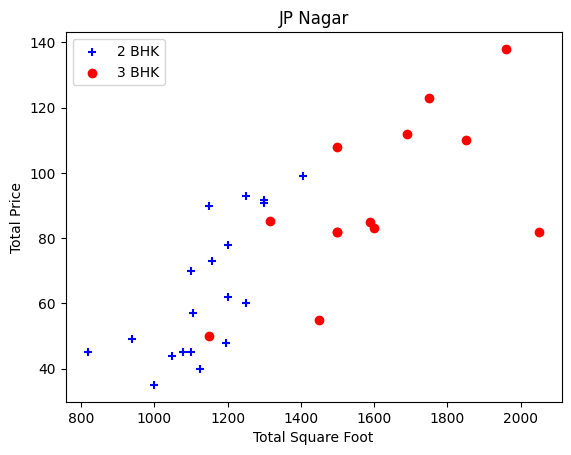

In [ ]:
scatter_plot(df3,'JP Nagar')

In [ ]:
df3.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

In [ ]:
df3.sample(10)

,location,total_sqft,bath,balcony,price,BHK,Price Per Sqft
2447,Haralur Road,1243.0,2.0,2.0,46.00,2,3700.724055
1429,Chandapura,1110.0,2.0,2.0,29.97,3,2700.000000
2641,Hegde Nagar,1570.0,3.0,1.0,105.00,3,6687.898089
7422,other,1022.0,2.0,2.0,52.00,2,5088.062622
4795,Old Madras Road,1480.0,3.0,2.0,95.00,3,6418.918919
4559,Marathahalli,1026.0,2.0,1.0,50.18,2,4890.838207
7262,other,1100.0,2.0,1.0,60.00,2,5454.545455
8084,other,1542.0,3.0,2.0,98.00,3,6355.382620
2525,Hebbal,3067.0,4.0,3.0,230.00,4,7499.184871
7118,other,1200.0,2.0,1.0,74.00,2,6166.666667


In [112]:
df3.bath.unique()

array([2., 3., 4., 5., 8., 1., 6., 7., 9.])

### Remove rows where no. of bathrooms are greater than or equal to 9 (because its unusual)

In [111]:
len(df3[df3['bath']>=9])

3

In [123]:
df4=df3[df3['bath']<9]
df4.shape

(7024, 6)

Also checking if no. of bathrooms are less than or equal to no. of BHK + 2 ,otherwise if no. of bathrooms are greater than no. of bhk it is unusual 

In [120]:
df4=df4[df4['bath']<=(df4.BHK + 2)]
df4.shape

(7022, 6)

Dropping the price per sqft column , it was only for outlier detection

In [125]:
df4.rename(columns={'Price Per Sqft': 'price_per_sqft'},inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_11048\1494548384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns={'Price Per Sqft': 'price_per_sqft'},inplace=True)


In [126]:
df4

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...
7022,Yeshwanthpur,1169.0,2.0,64.08,2,5481.608212
7023,Yeshwanthpur,2500.0,5.0,185.00,6,7400.000000
7024,Yeshwanthpur,1160.0,2.0,64.08,2,5524.137931
7025,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032


In [127]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [128]:
df6 = remove_bhk_outliers(df4)
df6.shape

(5423, 6)

### Finally converting location column to dummies ( one hot encoding )

In [144]:
location_label=pd.get_dummies(df4.location,dtype=int)
location_label

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
df5=pd.concat([location_label,df4.drop(['price_per_sqft','location'],axis=1)],axis=1)

In [146]:
df5

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,price,BHK
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1250.0,2.0,44.00,3
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1250.0,2.0,40.00,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2.0,83.00,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1170.0,2.0,40.00,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1425.0,2.0,65.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1169.0,2.0,64.08,2
7023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2500.0,5.0,185.00,6
7024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1160.0,2.0,64.08,2
7025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1855.0,3.0,135.00,3


## Now let's train and test the model 

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

Provide input and target variable to Model

In [147]:
inputs=df5.drop(['price'],axis=1)
target=df5.price

In [148]:
inputs


,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,BHK
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1250.0,2.0,3
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1250.0,2.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1170.0,2.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1425.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1169.0,2.0,2
7023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2500.0,5.0,6
7024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1160.0,2.0,2
7025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1855.0,3.0,3


In [149]:
cv=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),inputs,target,cv=cv)

array([0.83318686, 0.8198773 , 0.81142515, 0.85325188, 0.82819387])

In [ ]:
# cross_val_score(DecisionTreeRegressor(),inputs,target,cv=cv)

### Find best model

In [ ]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso


# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])




In [ ]:

# find_best_model_using_gridsearchcv(inputs,target)

In [189]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [190]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8335424312769866

In [191]:
import pickle
with open('house_prices_prediction.pickle','wb') as f:
    pickle.dump(model,f)


In [192]:
inputs.columns

Index([' Devarachikkanahalli', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'total_sqft',
       'bath', 'BHK'],
      dtype='object', length=238)

In [193]:
import json
columns={
'data_columns': [i.lower() for i in inputs.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))